In [2]:
#import the required libraries
import pandas as pd
import math
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
#read data into dataframe
data = pd.read_csv ('./datasets/regression.csv')
#Examine the first few rows 
print(data.head())

   X  Y
0  1  3
1  2  4
2  3  8
3  4  4
4  5  6


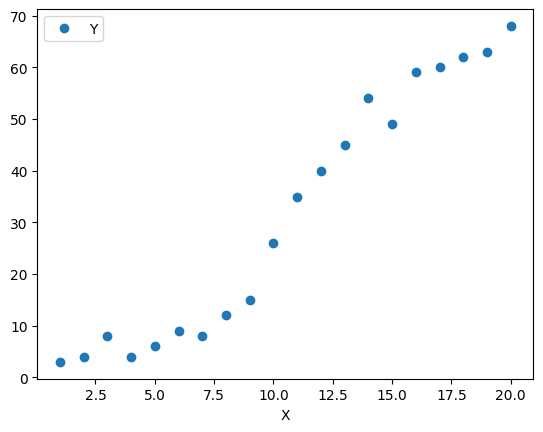

In [4]:

#Initial exploratory analysis using pandas dataframes
df = pd.DataFrame(data)
df.plot(x = 'X', y = 'Y', subplots = True, layout = (1,1), style = 'o')
plt.show()


In [5]:
#split data into train and test sets
X = df['X'].values.reshape(-1,1)
Y = df['Y'].values.reshape(-1,1)
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.2)

In [6]:
#Linear Regression
model =  LR()
model.fit(train_X, train_Y)

LinearRegression()

In [7]:
#make prediction for each X in test set
pred_Y = model.predict(test_X)
rmseLR = math.sqrt(((test_Y - pred_Y)**2).mean()) 

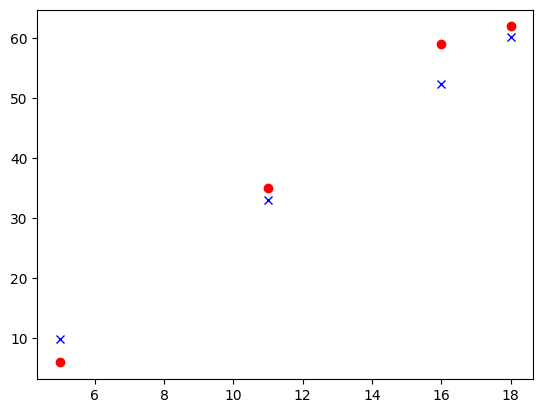

In [8]:
#visualize prediction
plt.plot(test_X, test_Y,'ro')
plt.plot(test_X, pred_Y, 'bx')
plt.show()

In [9]:
#Support Vector Regression
#modelSVR =  SVR(gamma='auto')
modelSVR = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
modelSVR.fit(train_X, train_Y.ravel())

SVR(C=100, gamma=0.1)

In [10]:
#make prediction for each X in test set
pred_Y_SVR = modelSVR.predict(test_X)
rmseSVR = math.sqrt(((test_Y - pred_Y_SVR)**2).mean()) 

In [11]:
rmseSVR


30.813907526599692

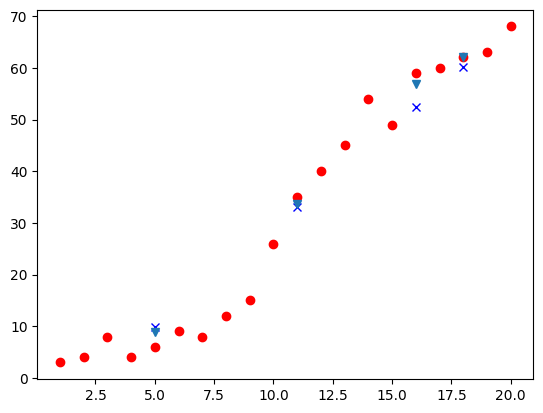

In [12]:
plt.plot(test_X, test_Y,'ro')
plt.plot(train_X, train_Y,'ro')
plt.plot(test_X, pred_Y, 'bx')
plt.plot(test_X, pred_Y_SVR, 'v')
plt.show()
